In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import export_graphviz, DecisionTreeRegressor, plot_tree
from IPython.display import Image
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.inspection import permutation_importance

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df= pd.read_csv('speed_dating_data.csv')
df.head(50)

,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,0,21.0,69487.0,2.0,lawyer,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0
1,0,21.0,69487.0,2.0,lawyer,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0
2,0,21.0,69487.0,2.0,lawyer,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0
3,0,21.0,69487.0,2.0,lawyer,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0
4,0,21.0,69487.0,2.0,lawyer,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0
5,0,21.0,69487.0,2.0,lawyer,0,4.0,9.0,7.0,4.0,6.0,4.0,6.0,5.0,2.0
6,0,21.0,69487.0,2.0,lawyer,1,7.0,6.0,7.0,4.0,6.0,7.0,6.0,5.0,2.0
7,0,21.0,69487.0,2.0,lawyer,0,4.0,9.0,7.0,6.0,5.0,6.0,6.0,7.0,NaN
8,0,21.0,69487.0,2.0,lawyer,1,7.0,6.0,8.0,9.0,8.0,8.0,7.0,7.0,2.0
9,0,21.0,69487.0,2.0,lawyer,1,5.0,6.0,6.0,8.0,10.0,8.0,6.0,6.0,2.0


In [3]:
df.columns #target: dec;  features: income, attr, sinc, intel, fun, amb, 

Index(['gender', 'age', 'income', 'goal', 'career', 'dec', 'attr', 'sinc',
       'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met'],
      dtype='object')

In [4]:
len(df['career'].unique())
# career with too many unique entries to clean

368

In [5]:
df.shape

(8378, 15)

In [6]:
df.dtypes

gender      int64
age       float64
income    float64
goal      float64
career     object
dec         int64
attr      float64
sinc      float64
intel     float64
fun       float64
amb       float64
shar      float64
like      float64
prob      float64
met       float64
dtype: object

In [7]:
# generate id column to be able to calculate mean ratings pp
df['id'] = df.set_index(['gender', 'age', 'income', 'career']).index.factorize()[0]+1

In [8]:
# dropping cols that are partner-dependent or have too many missings
df = df.drop(columns=['goal','income', 'prob', 'shar', 'met', 'career'])

In [9]:
# pd.set_option('display.max_rows', None)
print(df)

      gender   age  dec  attr  sinc  intel  fun  amb  like   id
0          0  21.0    1   6.0   9.0    7.0  7.0  6.0   7.0    1
1          0  21.0    1   7.0   8.0    7.0  8.0  5.0   7.0    1
2          0  21.0    1   5.0   8.0    9.0  8.0  5.0   7.0    1
3          0  21.0    1   7.0   6.0    8.0  7.0  6.0   7.0    1
4          0  21.0    1   5.0   6.0    7.0  7.0  6.0   6.0    1
...      ...   ...  ...   ...   ...    ...  ...  ...   ...  ...
8373       1  25.0    0   3.0   5.0    5.0  5.0  NaN   2.0  539
8374       1  25.0    0   4.0   6.0    8.0  4.0  4.0   4.0  539
8375       1  25.0    0   4.0   7.0    8.0  8.0  8.0   6.0  539
8376       1  25.0    0   4.0   6.0    5.0  4.0  NaN   5.0  539
8377       1  25.0    0   3.0   7.0    6.0  4.0  8.0   4.0  539

[8378 rows x 10 columns]


In [10]:
# calculate average scores
average_scores = df.groupby('id')[['attr', 'sinc', 'intel', 'fun', 'amb', 'like', 'dec']].mean().reset_index()
average_scores

,id,attr,sinc,intel,fun,amb,like,dec
0,1,5.700000,7.300000,7.300000,6.800000,6.300000,6.500000,0.800000
1,2,6.400000,7.000000,7.700000,6.100000,6.500000,6.600000,0.400000
2,3,8.100000,8.600000,9.400000,7.700000,8.800000,8.200000,0.000000
3,4,6.400000,8.900000,8.600000,7.800000,7.800000,6.600000,0.300000
4,5,6.300000,6.000000,7.000000,6.000000,5.600000,7.200000,0.600000
...,...,...,...,...,...,...,...,...
534,535,4.476190,6.714286,5.809524,4.476190,3.904762,5.047619,0.409091
535,536,4.590909,7.045455,6.909091,6.727273,6.863636,5.363636,0.409091
536,537,5.636364,5.954545,5.772727,5.500000,5.045455,5.500000,0.318182
537,538,6.350000,7.100000,7.400000,6.700000,6.700000,7.150000,0.363636


In [11]:
# drop old columns
df = df.groupby('id').first()
df = df.drop(columns = ['attr', 'sinc', 'intel', 'fun', 'amb', 'like','dec']).join(average_scores.set_index('id'), on = 'id')
df

,gender,age,attr,sinc,intel,fun,amb,like,dec
id,,,,,,,,,
1,0,21.0,5.700000,7.300000,7.300000,6.800000,6.300000,6.500000,0.800000
2,0,24.0,6.400000,7.000000,7.700000,6.100000,6.500000,6.600000,0.400000
3,0,25.0,8.100000,8.600000,9.400000,7.700000,8.800000,8.200000,0.000000
4,0,23.0,6.400000,8.900000,8.600000,7.800000,7.800000,6.600000,0.300000
5,0,21.0,6.300000,6.000000,7.000000,6.000000,5.600000,7.200000,0.600000
...,...,...,...,...,...,...,...,...,...
535,1,30.0,4.476190,6.714286,5.809524,4.476190,3.904762,5.047619,0.409091
536,1,28.0,4.590909,7.045455,6.909091,6.727273,6.863636,5.363636,0.409091
537,1,30.0,5.636364,5.954545,5.772727,5.500000,5.045455,5.500000,0.318182


In [12]:
#df.to_csv('match_clean.csv')

In [13]:
# check nans
df.isna().sum()

gender    0
age       4
attr      0
sinc      1
intel     1
fun       1
amb       1
like      0
dec       0
dtype: int64

In [14]:
# remove nans
df= df.dropna()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


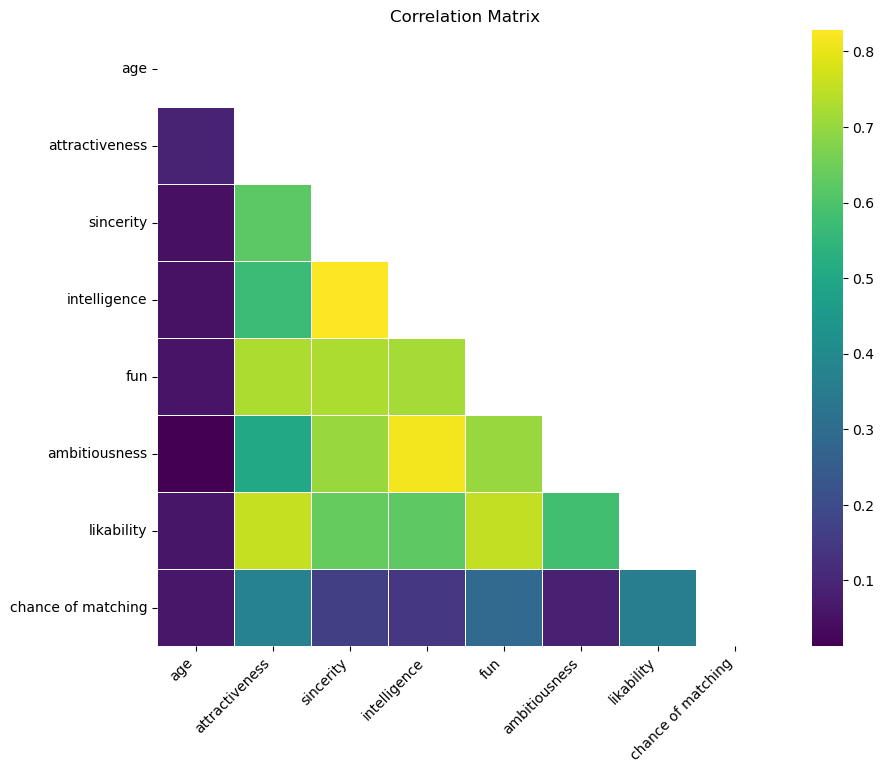

In [15]:
# define renaming dictionary for corrmat
rename_dict = {
    'attr': 'attractiveness',
    'sinc': 'sincerity',
    'intel': 'intelligence',
    'fun': 'fun',
    'amb': 'ambitiousness',
    'like': 'likability',
    'dec': 'chance of matching'}

# drop gender and rename columns for corr matrix viz
correlation_matrix = df.drop(columns=['gender']).rename(columns=rename_dict).corr()

# mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='viridis', square=True, linewidths=0.5)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix")
plt.show()

In [16]:
# model performance drops if we remove intelligence
#df = df.drop(columns = 'intel')

In [17]:
# Train Test Split
target = df['dec']
df = df.drop(columns= ['dec'])
features = df.select_dtypes(include=['number'])
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [18]:
# normalization
normalizer = MinMaxScaler()

In [19]:
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [20]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,gender,age,attr,sinc,intel,fun,amb,like
0,0.0,0.243243,0.407692,0.604672,0.571921,0.511979,0.441729,0.573553
1,0.0,0.270270,0.289583,0.481132,0.535345,0.163043,0.620066,0.407063
2,1.0,0.135135,0.348148,0.492662,0.367816,0.385093,0.445175,0.529740
3,1.0,0.486486,0.572222,0.644205,0.577340,0.316770,0.390038,0.494689
4,0.0,0.486486,0.572222,0.688679,0.734483,0.685714,0.710526,0.560409


# KNN

In [22]:
knn = KNeighborsRegressor(n_neighbors=5)

In [23]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor()

In [24]:
pred = knn.predict(X_test_norm)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [25]:
mea = mean_absolute_error(pred, y_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f'Mean absolue error: {mea}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}').  

Mean Squared Error: 0.04867928663444335
R^2 Score: 0.23071200669859782


In [26]:
knn.score(X_test_norm, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


0.23071200669859782

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning

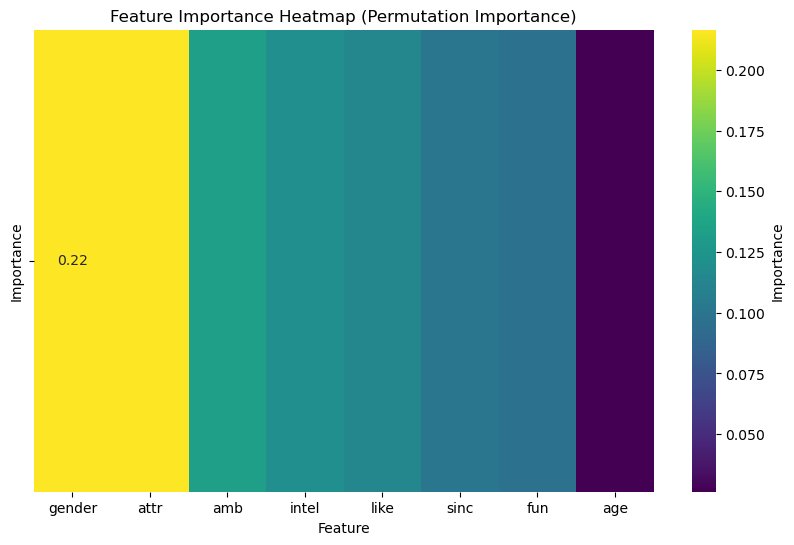

In [27]:
# viz for KNN
# permutation importance
perm_importance = permutation_importance(knn, X_test_norm, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean})

# sortby importance & plot
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.heatmap(importance_df.set_index('Feature').T, annot=True, cmap='viridis', cbar_kws={'label': 'Importance'})
plt.title('Feature Importance Heatmap (Permutation Importance)')
plt.show()

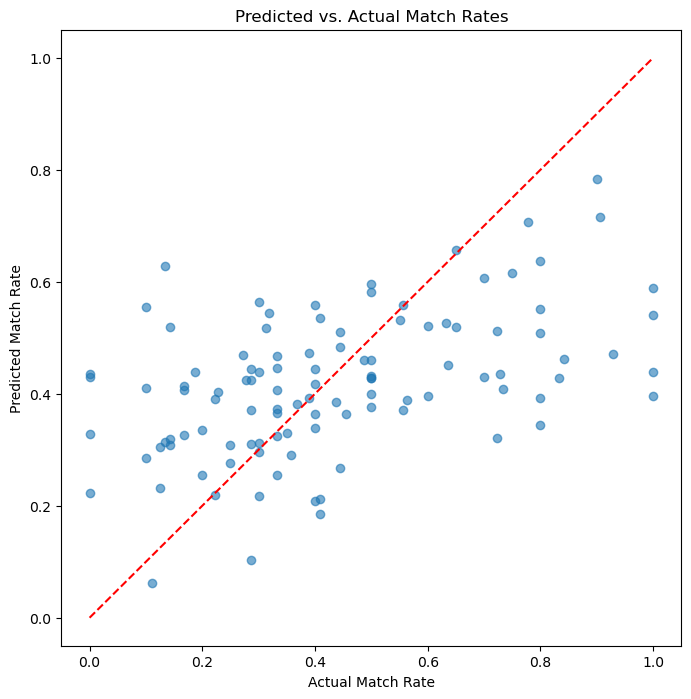

In [28]:
# Scatter plot of actual vs. predicted match rates
plt.figure(figsize=(8, 8))
plt.scatter(y_test, pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line for reference
plt.xlabel('Actual Match Rate')
plt.ylabel('Predicted Match Rate')
plt.title('Predicted vs. Actual Match Rates')
plt.show()

# DECISION TREE

In [30]:
dt = DecisionTreeRegressor(random_state=0, max_depth=3)
dt.fit(X_train_norm, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [31]:
pred = dt.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", dt.score(X_test_norm, y_test))

MAE 0.18576777748484075
RMSE 0.2353806909936644
R2 score 0.12443898542185505


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>


[Text(0.5, 0.875, 'X[2] <= 0.617\nsquared_error = 0.064\nsamples = 425\nvalue = 0.425'),
 Text(0.25, 0.625, 'X[7] <= 0.404\nsquared_error = 0.057\nsamples = 319\nvalue = 0.38'),
 Text(0.125, 0.375, 'X[4] <= 0.79\nsquared_error = 0.044\nsamples = 48\nvalue = 0.218'),
 Text(0.0625, 0.125, 'squared_error = 0.031\nsamples = 47\nvalue = 0.201'),
 Text(0.1875, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.375, 0.375, 'X[3] <= 0.34\nsquared_error = 0.054\nsamples = 271\nvalue = 0.409'),
 Text(0.3125, 0.125, 'squared_error = 0.017\nsamples = 6\nvalue = 0.814'),
 Text(0.4375, 0.125, 'squared_error = 0.052\nsamples = 265\nvalue = 0.4'),
 Text(0.75, 0.625, 'X[3] <= 0.988\nsquared_error = 0.058\nsamples = 106\nvalue = 0.561'),
 Text(0.625, 0.375, 'X[0] <= 0.5\nsquared_error = 0.054\nsamples = 102\nvalue = 0.545'),
 Text(0.5625, 0.125, 'squared_error = 0.046\nsamples = 36\nvalue = 0.464'),
 Text(0.6875, 0.125, 'squared_error = 0.053\nsamples = 66\nvalue = 0.589'),
 Text(0.875, 0.

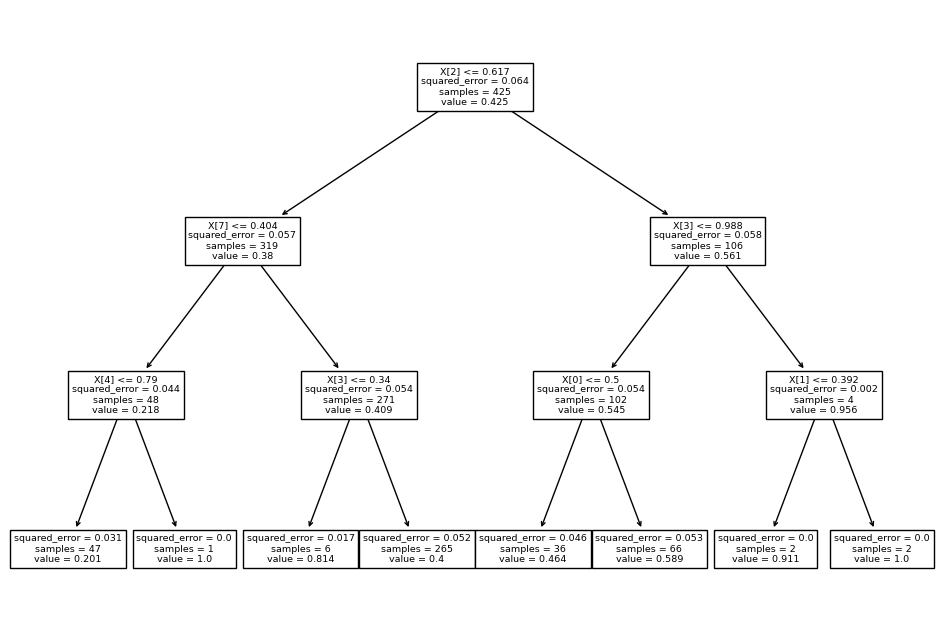

In [32]:
print(type(X_test))
plt.figure(figsize=(12, 8))
plot_tree(dt)

# RANDOM FOREST

### hyperparameter tuning

In [35]:
rf = RandomForestRegressor(random_state=42)

# current default parameters
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [36]:
# --- Hyperparameter Grid Setup for Randomized Search ---
# Define a range of hyperparameters to test in the RandomizedSearchCV

# List of potential values for the number of trees in the forest (n_estimators)
n_estimators = [int(x) for x in np.linspace(start=2, stop=200, num=10)]

# Maximum depth of each tree (max_depth), with None allowing unlimited depth
max_depth = [int(x) for x in np.linspace(2, 200, num=11)]
max_depth.append(None)

# Minimum samples required to split a node (min_samples_split)
min_samples_split = [2, 5, 10, 20, 30]

# Minimum samples required at each leaf node (min_samples_leaf)
min_samples_leaf = [1, 2, 4, 10, 20]

# Number of features to consider when splitting (max_features)
max_features = ['auto', 'sqrt', 'log2', None]

# Whether or not bootstrap samples are used when building trees (bootstrap)
bootstrap = [True, False]

# Maximum number of leaf nodes (max_leaf_nodes) to control tree complexity
max_leaf_nodes = [None, 10, 20, 50, 100]

# Combine all parameters into a dictionary for RandomizedSearchCV
random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features,
    'bootstrap': bootstrap,
    'max_leaf_nodes': max_leaf_nodes}

# show the parameter grid
print("Hyperparameter grid for Randomized Search:")
pprint(random_grid)

Hyperparameter grid for Randomized Search:
{'bootstrap': [True, False],
 'max_depth': [2, 21, 41, 61, 81, 101, 120, 140, 160, 180, 200, None],
 'max_features': ['auto', 'sqrt', 'log2', None],
 'max_leaf_nodes': [None, 10, 20, 50, 100],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 30],
 'n_estimators': [2, 24, 46, 68, 90, 112, 134, 156, 178, 200]}


In [37]:
# --- Randomized Search for Hyperparameter Tuning ---
# Instantiate a new RandomForestRegressor as a base model for tuning
rf = RandomForestRegressor()

# Initialize RandomizedSearchCV with the random grid, 3-fold cross-validation,
# 100 different parameter combinations, and verbose output for tracking progress
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid,
                               n_iter=100,
                               cv=3,
                               verbose=2,
                               random_state=42)

#fit randomized search model to training data
rf_random.fit(X_train, y_train)

# get best parameters from rand search
best_params_random = rf_random.best_params_
print("Best parameters from RandomizedSearchCV:\n", best_params_random)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=61, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=30, n_estimators=112; total time=   0.2s
[CV] END bootstrap=True, max_depth=61, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=30, n_estimators=112; total time=   0.2s
[CV] END bootstrap=True, max_depth=61, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=30, n_estimators=112; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=5, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=5, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=5, n_estimators=2; total time=   0.0s
[CV] END boot

In [38]:
# --- Model Evaluation Function ---
# Define a function to evaluate model performance for regression
def evaluate(model, X, y):
    predictions = model.predict(X)
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    return mae, mse, r2

In [39]:
# --- Baseline Model Evaluation ---
# Initialize a basic RandomForestRegressor with minimal tuning (10 estimators)
base_model = RandomForestRegressor(n_estimators=10, random_state=42, max_depth=3)
base_model.fit(X_train, y_train)

# evaluate baseline model
base_mae, base_mse, base_r2 = evaluate(base_model, X_test, y_test)

# evaluate best model from randomized search
best_random = rf_random.best_estimator_
random_mae, random_mse, random_r2 = evaluate(best_random, X_test, y_test)

print('Baseline MAE: {:.2f}, MSE: {:.2f}, R²: {:.2f}'.format(base_mae, base_mse, base_r2))
print('Best Random Model MAE: {:.2f}, MSE: {:.2f}, R²: {:.2f}'.format(random_mae, random_mse, random_r2))
print('Improvement in MAE: {:.2f}.'.format(base_mae - random_mae))

Baseline MAE: 0.18, MSE: 0.05, R²: 0.15
Best Random Model MAE: 0.18, MSE: 0.05, R²: 0.16
Improvement in MAE: 0.00.


In [40]:
# --- Hyperparameter Grid Setup for Grid Search ---
# Define a smaller parameter grid for a more exhaustive grid search around the best randomized parameters
param_grid = {
    'n_estimators': [120, 130, 134, 140, 150],
    'max_depth': [150, 155, 160, 165, 170],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'max_leaf_nodes': [8, 10, 12],
    'max_features': ['sqrt'],
    'bootstrap': [True]}

# Instantiate a new RandomForestRegressor for grid search
rf = RandomForestRegressor()

# Initialize GridSearchCV with the parameter grid, 3-fold cross-validation,
# and parallel processing for faster execution
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters from the grid search
best_params_grid = grid_search.best_params_
print("Best parameters from GridSearchCV:\n", best_params_grid)

# Evaluate the best model from the grid search on the test data
best_grid = grid_search.best_estimator_
grid_mae, grid_mse, grid_r2 = evaluate(best_grid, X_test, y_test)

# Print improvement in R² Score over baseline
print('Improvement in R² Score over baseline: {:.2f}'.format(grid_r2 - base_r2))

# Additional Evaluation
y_pred_rf = best_grid.predict(X_test)
print("MAE:", mean_absolute_error(y_pred_rf, y_test))
print("RMSE:", mean_squared_error(y_pred_rf, y_test, squared=False))
print("R2 score:", best_grid.score(X_test, y_test))

Fitting 3 folds for each of 675 candidates, totalling 2025 fits
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require I

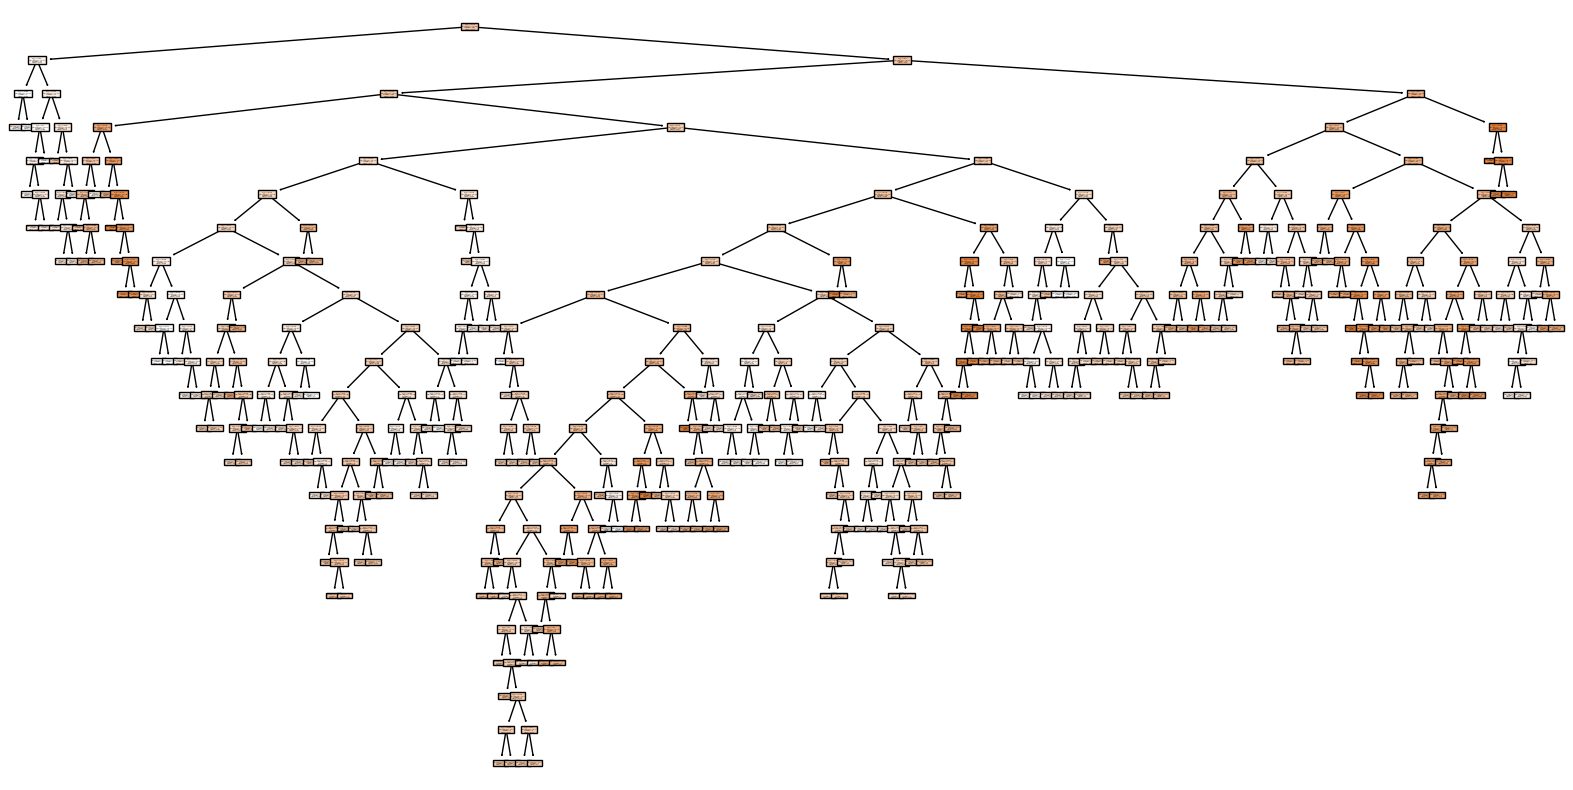

In [41]:
# Plot one tree from the final random forest model for visualization
rf = RandomForestRegressor(n_estimators=10, random_state=0)
rf.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[9], filled=True)
plt.show()

# ADABOOST

In [43]:
# AdaBoostRegressor with DecisionTrees
ada_cl = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(
        max_depth=3,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42),
    n_estimators=100,
    learning_rate=0.1,
    random_state=42)

ada_cl.fit(X_train_norm, y_train)
y_pred_abc = ada_cl.predict(X_test_norm)

mae = mean_absolute_error(y_test, y_pred_abc)
mse = mean_squared_error(y_test, y_pred_abc)
r2 = r2_score(y_test, y_pred_abc)

print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance Metrics:
Mean Absolute Error (MAE): 0.1843
Mean Squared Error (MSE): 0.0539
R-squared (R²): 0.1488


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(
